# The lighthouse problem

Florent Leclercq,<br/>
Institut d'Astrophysique de Paris,<br/>
florent.leclercq@iap.fr

In [1]:
from scipy.stats import cauchy, uniform, norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 15})
dir="./plots/Lighthouse_problem/"
!mkdir -p $dir

## Prior choice

In [3]:
d=2 #arbitrary units
xmin=-10
xmax=10

\begin{equation}
x= d \tan \theta
\end{equation}

\begin{equation}
p(\theta) = C \Rightarrow p(x) \propto \frac{d}{x^2+d^2}
\end{equation}

In [4]:
def p_flat(x):
    return uniform.pdf(x, loc=xmin, scale=xmax-xmin)

def p_Jeffrey(x):
    return 2.5e-2/np.abs(x)

def p_Cauchy(x):
    return cauchy.pdf(x, loc=0, scale=d)

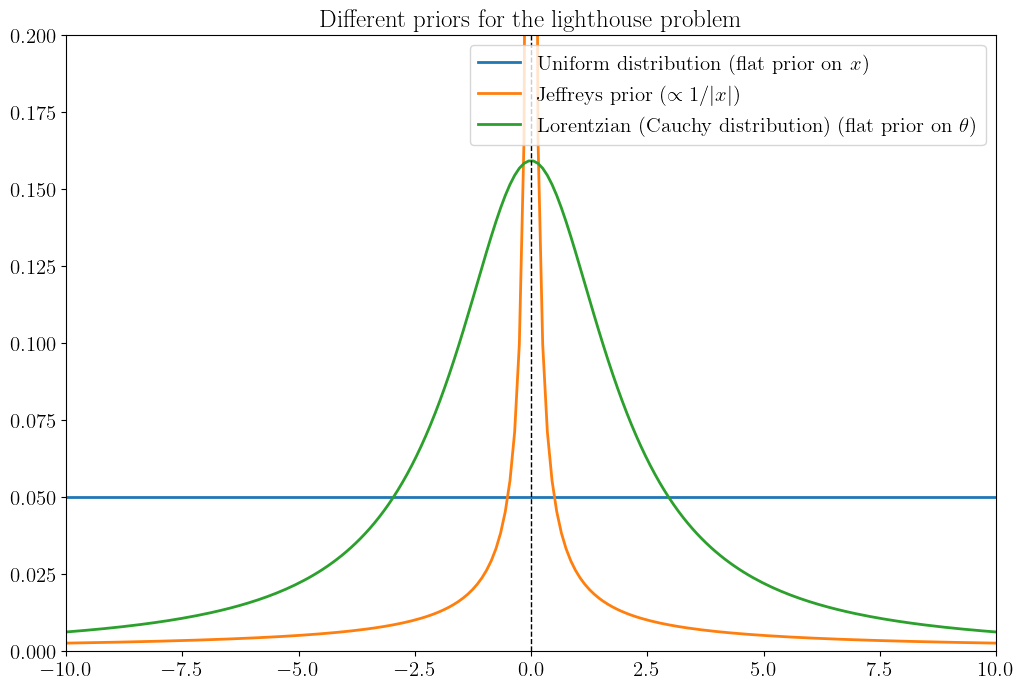

In [5]:
x=np.linspace(xmin,xmax,200)
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim(xmin,xmax)
ax.set_ylim(0,0.2)
ax.plot(x,p_flat(x),label="Uniform distribution (flat prior on $x$)")
ax.plot(x,p_Jeffrey(x),label="Jeffreys prior ($\propto 1/|x|$)")
ax.plot(x,p_Cauchy(x),label="Lorentzian (Cauchy distribution) (flat prior on $\\theta$)")
ax.set_title("Different priors for the lighthouse problem")
ax.vlines(0, 0, 0.2, color="black", linestyle="--", lw=1)
ax.legend(loc="best")
plt.savefig(dir+'lighthouse_priors.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'lighthouse_priors.png',dpi=100,bbox_inches="tight")
plt.show()

Maximum ignorance for one variable is not the same thing as maximum ignorance on a non-linear function of that variable!

In [6]:
def p_Gaussian(x):
    return norm.pdf(x, loc=0, scale=d)

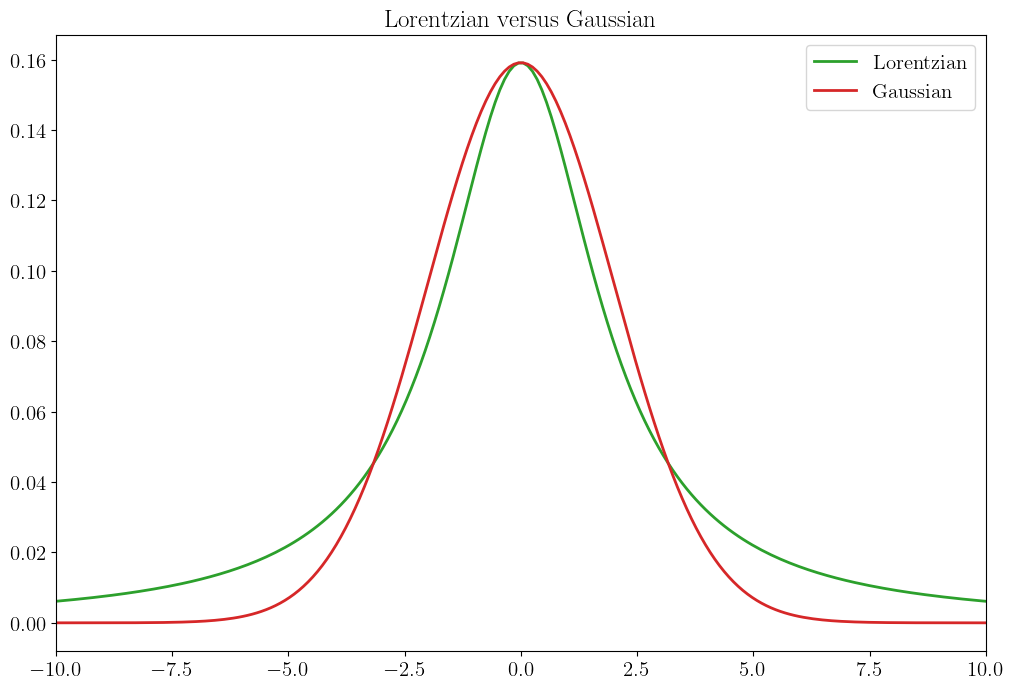

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim(xmin,xmax)
ax.plot(x,p_Cauchy(x),label="Lorentzian",color='C2')
ax.plot(x,p_Gaussian(x)*p_Cauchy(0)/p_Gaussian(0),
         label="Gaussian",color='C3')
ax.set_title("Lorentzian versus Gaussian")
ax.legend(loc="best")
plt.savefig(dir+'lorentzian_vs_gaussian.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'lorentzian_vs_gaussian.png',dpi=100,bbox_inches="tight")
plt.show()

The Lorentzian has broader tails than the Gaussian.